In [1]:
import os
import shutil
import random
import numpy as np
import pickle
from glob import glob
from matplotlib import pyplot as plt

In [2]:
def background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for array in current_frame_data:
        for point in array:
            distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
            if np.min(distances) > threshold:
                filtered_data.append(point)
            else:
                num_points_removed +=1
                points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data)

In [3]:
def remove_duplicates(background_data):
    rounded_xyz = np.round(background_data[:,:3], decimals=3)
    cleaned_data = []
    seen = set()
    for i, xyz in enumerate(rounded_xyz):
        xyz_tuple = tuple(xyz)
        if xyz_tuple not in seen:
            seen.add(xyz_tuple)
            cleaned_data.append(i)
    return background_data[cleaned_data]

In [9]:
def load_merge_bg(bg_files):
    for f in bg_files[:1]:
        with open(f, 'rb') as file:
            data = pickle.load(file)
            data = np.vstack(data)    
            bg_noise.append(data)
    bg_noise = np.vstack(bg_noise)
    return bg_noise

In [20]:
def plot_data(data):
    x_lim = (-0.5635, 4.37)
    y_lim = (0.03125, 5.16)
    z_lim = (-1.889, 2.06)
    
    fig = plt.figure(figsize=(8, 12))
    ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

    # Plot the filtered points
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], color='blue', alpha=0.1)

    # Set plot title and labels
    ax.set_title('Entire Field Scatter Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)


In [16]:
bg_noise_dir = 'data/03_09_2024_katie_pc_bg_noise/all_samples_merged.pkl'
with open(bg_noise_dir, 'rb') as file:
        background_data = pickle.load(file)

In [17]:
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(os.getcwd(), bg_noise_folder))
bg_noise = load_merge_bg

(49855, 5)


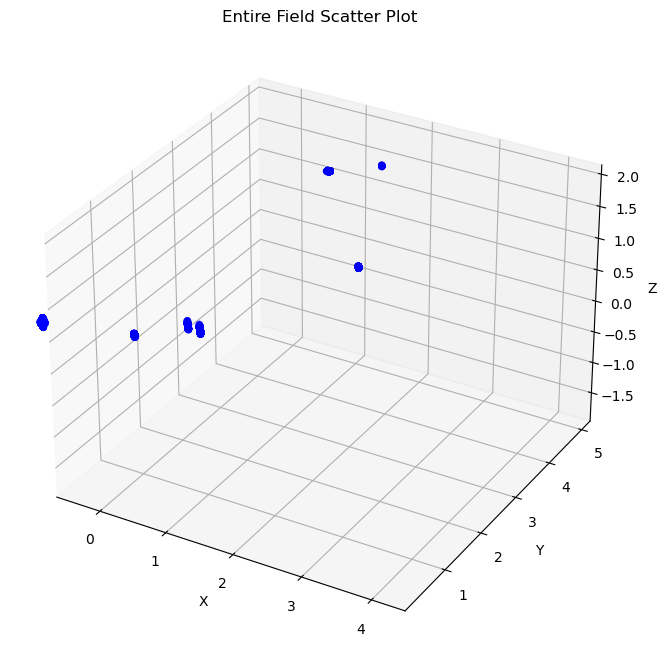

In [23]:
print(background_data.shape)
plot_data(background_data)